<a href="https://colab.research.google.com/github/wetwetwet/Credit-card-fraud-detection/blob/main/Final_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Final Assignment
import pandas as pd
import keras
import numpy as np
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bank = pd.read_csv("/content/drive/MyDrive/AN6001/Credit Card Default.csv")

In [ ]:
print(bank)

      clientid       income        age         loan  default
0            1  66155.92510  59.017015  8106.532131        0
1            2  34415.15397  48.117153  6564.745018        0
2            3  57317.17006  63.108049  8020.953296        0
3            4  42709.53420  45.751972  6103.642260        0
4            5  66952.68885  18.584336  8770.099235        1
...        ...          ...        ...          ...      ...
1995      1996  59221.04487  48.518179  1926.729397        0
1996      1997  69516.12757  23.162104  3503.176156        0
1997      1998  44311.44926  28.017167  5522.786693        1
1998      1999  43756.05660  63.971796  1622.722598        0
1999      2000  69436.57955  56.152617  7378.833599        0

[2000 rows x 5 columns]


# **Data Wrangling**

In [ ]:
bank.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459720,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117310,41.317159,3974.719418,0.000000
75%,1500.250000,57791.281670,52.587040,6432.410625,0.000000
max,2000.000000,69995.685580,63.971796,13766.051240,1.000000


In [ ]:
# Remove people who's age is smaller than 18, since people who's under the age limit(i.e. 18) cannot have jobs and income.
bank_clean = bank[bank.loc[:,"age"]>=18]
print(bank_clean.age.describe())
print(bank_clean.describe())

count    1994.000000
mean       40.927700
std        13.271802
min        18.055189
25%        29.043284
50%        41.382673
75%        52.616900
max        63.971796
Name: age, dtype: float64
          clientid        income          age          loan      default
count  1994.000000   1994.000000  1994.000000   1994.000000  1994.000000
mean   1003.431795  45328.856915    40.927700   4443.240892     0.141926
std     575.879624  14326.777212    13.271802   3046.879619     0.349062
min       1.000000  20014.489470    18.055189      1.377630     0.000000
25%     505.250000  32812.340053    29.043284   1934.218490     0.000000
50%    1003.500000  45785.950925    41.382673   3971.653442     0.000000
75%    1501.750000  57782.054535    52.616900   6438.044498     0.000000
max    2000.000000  69995.685580    63.971796  13766.051240     1.000000


In [ ]:
# Remove meaningless columns(i.e. the Client ID)
bank_clean = bank_clean.iloc[:,1:5]
print(bank_clean)

           income        age         loan  default
0     66155.92510  59.017015  8106.532131        0
1     34415.15397  48.117153  6564.745018        0
2     57317.17006  63.108049  8020.953296        0
3     42709.53420  45.751972  6103.642260        0
4     66952.68885  18.584336  8770.099235        1
...           ...        ...          ...      ...
1995  59221.04487  48.518179  1926.729397        0
1996  69516.12757  23.162104  3503.176156        0
1997  44311.44926  28.017167  5522.786693        1
1998  43756.05660  63.971796  1622.722598        0
1999  69436.57955  56.152617  7378.833599        0

[1994 rows x 4 columns]


In [ ]:
# Drop NAs
bank_clean = bank_clean.dropna()

In [ ]:
bank_clean.isna().any()

income     False
age        False
loan       False
default    False
dtype: bool

In [ ]:
# Drop NaN
bank_clean.isnull().values.any()

False

In [ ]:
bank_clean.describe()

,income,age,loan,default
count,1994.000000,1994.000000,1994.000000,1994.000000
mean,45328.856915,40.927700,4443.240892,0.141926
std,14326.777212,13.271802,3046.879619,0.349062
min,20014.489470,18.055189,1.377630,0.000000
25%,32812.340053,29.043284,1934.218490,0.000000
50%,45785.950925,41.382673,3971.653442,0.000000
75%,57782.054535,52.616900,6438.044498,0.000000
max,69995.685580,63.971796,13766.051240,1.000000


In [ ]:
# Normalization

In [ ]:
bank_clean["income"]=stats.zscore(bank_clean["income"].astype(np.float))
print(bank_clean)

        income        age         loan  default
0     1.454081  59.017015  8106.532131        0
1    -0.761961  48.117153  6564.745018        0
2     0.836987  63.108049  8020.953296        0
3    -0.182873  45.751972  6103.642260        0
4     1.509708  18.584336  8770.099235        1
...        ...        ...          ...      ...
1995  0.969909  48.518179  1926.729397        0
1996  1.688680  23.162104  3503.176156        0
1997 -0.071032  28.017167  5522.786693        1
1998 -0.109808  63.971796  1622.722598        0
1999  1.683126  56.152617  7378.833599        0

[1994 rows x 4 columns]


In [ ]:
bank_clean["loan"]=stats.zscore(bank_clean["loan"].astype(np.float))
print(bank_clean)

        income        age      loan  default
0     1.454081  59.017015  1.202611        0
1    -0.761961  48.117153  0.696462        0
2     0.836987  63.108049  1.174516        0
3    -0.182873  45.751972  0.545088        0
4     1.509708  18.584336  1.420451        1
...        ...        ...       ...      ...
1995  0.969909  48.518179 -0.826138        0
1996  1.688680  23.162104 -0.308611        0
1997 -0.071032  28.017167  0.354401        1
1998 -0.109808  63.971796 -0.925939        0
1999  1.683126  56.152617  0.963717        0

[1994 rows x 4 columns]


In [ ]:
# Remove Outlier

In [ ]:
z = stats.zscore(bank_clean.astype(np.float))
print(z)
abs_z = np.abs(z)
filtered = (abs_z < 3).all(axis=1)
bank_clean = bank_clean[filtered]

print(bank_clean)  # Remain (1993, 4)

[[ 1.45408086  1.36333045  1.20261074 -0.40669442]
 [-0.76196066  0.54184472  0.69646214 -0.40669442]
 [ 0.83698659  1.67165787  1.17451633 -0.40669442]
 ...
 [-0.07103223 -0.97302324  0.35440081  2.45884859]
 [-0.10980801  1.73675551 -0.92593938 -0.40669442]
 [ 1.68312591  1.14745046  0.9637168  -0.40669442]]
        income        age      loan  default
0     1.454081  59.017015  1.202611        0
1    -0.761961  48.117153  0.696462        0
2     0.836987  63.108049  1.174516        0
3    -0.182873  45.751972  0.545088        0
4     1.509708  18.584336  1.420451        1
...        ...        ...       ...      ...
1995  0.969909  48.518179 -0.826138        0
1996  1.688680  23.162104 -0.308611        0
1997 -0.071032  28.017167  0.354401        1
1998 -0.109808  63.971796 -0.925939        0
1999  1.683126  56.152617  0.963717        0

[1993 rows x 4 columns]


In [ ]:
bank_clean.describe()
# No categorical variables, so need not convert to dummy variables

,income,age,loan,default
count,1993.000000,1993.000000,1993.000000,1993.000000
mean,-0.000856,40.925886,-0.001536,0.141997
std,0.999772,13.274886,0.998148,0.349135
min,-1.767370,18.055189,-1.458206,0.000000
25%,-0.874383,29.033679,-0.823963,0.000000
50%,0.031718,41.353171,-0.154979,0.000000
75%,0.868289,52.626853,0.652094,0.000000
max,1.722161,63.971796,2.954659,1.000000


# Check Correlation

In [ ]:
bank_clean.corr()

,income,age,loan,default
income,1.000000,-0.033514,0.439811,0.002716
age,-0.033514,1.000000,0.006282,-0.445219
loan,0.439811,0.006282,1.000000,0.379322
default,0.002716,-0.445219,0.379322,1.000000


In [ ]:
# pip install seaborn

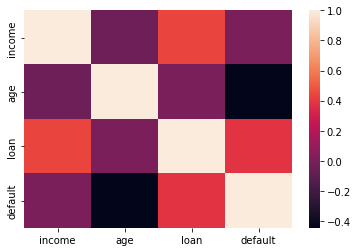

In [ ]:
import seaborn as sns
sns.heatmap(bank_clean.corr())

In [ ]:
X = bank_clean.iloc[:, 0:3]
Y = bank_clean.iloc[:, 3]
print(X,Y)

        income        age      loan
0     1.454081  59.017015  1.202611
1    -0.761961  48.117153  0.696462
2     0.836987  63.108049  1.174516
3    -0.182873  45.751972  0.545088
4     1.509708  18.584336  1.420451
...        ...        ...       ...
1995  0.969909  48.518179 -0.826138
1996  1.688680  23.162104 -0.308611
1997 -0.071032  28.017167  0.354401
1998 -0.109808  63.971796 -0.925939
1999  1.683126  56.152617  0.963717

[1993 rows x 3 columns] 0       0
1       0
2       0
3       0
4       1
       ..
1995    0
1996    0
1997    1
1998    0
1999    0
Name: default, Length: 1993, dtype: int64


# **Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

In [ ]:
print(X_train, X_test, Y_train, Y_test)

        income        age      loan
710   0.736901  27.370338 -1.138722
1221 -1.167105  58.861690  0.165866
1706  0.409896  22.403577 -0.124231
293  -0.954483  37.778664 -0.983275
1664 -1.285077  44.155571 -0.161924
...        ...        ...       ...
1173 -1.329137  52.401543 -1.099454
250  -1.662767  24.779528 -0.653247
67   -1.018841  22.242098  0.493606
1290 -0.125169  27.866907  0.651481
306  -0.095754  21.144849  0.319462

[1395 rows x 3 columns]         income        age      loan
1775 -1.191199  54.646277 -1.141739
925  -1.009248  38.952740 -0.120273
1878 -1.461017  52.027597 -1.425429
235   0.763679  22.486136  0.947437
152   1.417758  51.167714  2.711113
...        ...        ...       ...
1629 -0.178266  39.227083  0.558990
1321 -0.583564  33.704599 -1.042224
979   1.222717  62.197079 -1.423335
364  -0.710342  52.899213 -0.133127
1525  0.480113  24.640144 -1.086002

[598 rows x 3 columns] 710     0
1221    0
1706    0
293     0
1664    0
       ..
1173    0
250     0
67     

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


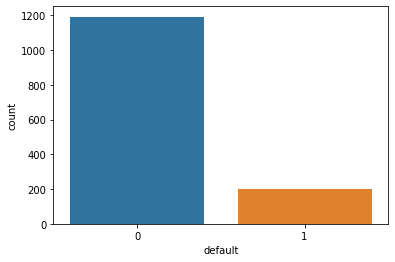

In [ ]:
# Check whether the dependent variable of train dataset is balanced or not
sns.countplot(Y_train)
# Imbalanced, needs resampling

In [ ]:
Y1_num = Y_train[Y_train.iloc[:]==1].count()
Y0_num = Y_train[Y_train.iloc[:]==0].count()
print(round(Y1_num/(Y0_num+Y1_num),4))
print(round(Y0_num/(Y0_num+Y1_num),4))
# The original proportion of default rate in the train dataset is 13.62%
# The Non-default rate in the train dataset is 86.38%

0.1448
0.8552


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

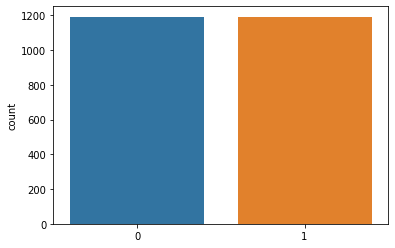

In [ ]:
## Oversampling
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler(random_state=6001)
os.fit(X_train, Y_train)
X_resampled, Y_resampled = os.fit_resample(X_train, Y_train)
sns.countplot(Y_resampled)
# Now the train dataset is balanced

In [ ]:
X_resampled = pd.DataFrame(X_resampled)
Y_resampled = pd.DataFrame(Y_resampled)

In [ ]:
XY_resampled = pd.concat([X_resampled,Y_resampled], axis=1)

# **NN**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

np.random.seed(6001)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# 5-fold Cross Validation
kf = KFold(n_splits=5, random_state=6001, shuffle=True)
kf

KFold(n_splits=5, random_state=6001, shuffle=True)

--------------------------------------------------
Training for fold 1 ...
Epoch 1/30
60/60 [==============================] - 1s 2ms/step - loss: 2.2242 - accuracy: 0.4958
Epoch 2/30
60/60 [==============================] - 0s 2ms/step - loss: 1.2217 - accuracy: 0.5026
Epoch 3/30
60/60 [==============================] - 0s 1ms/step - loss: 0.8939 - accuracy: 0.5063
Epoch 4/30
60/60 [==============================] - 0s 2ms/step - loss: 0.7662 - accuracy: 0.5430
Epoch 5/30
60/60 [==============================] - 0s 1ms/step - loss: 0.7411 - accuracy: 0.5304
Epoch 6/30
60/60 [==============================] - 0s 1ms/step - loss: 0.7066 - accuracy: 0.5535
Epoch 7/30
60/60 [==============================] - 0s 1ms/step - loss: 0.7138 - accuracy: 0.5388
Epoch 8/30
60/60 [==============================] - 0s 1ms/step - loss: 0.6893 - accuracy: 0.5702
Epoch 9/30
60/60 [==============================] - 0s 1ms/step - loss: 0.6635 - accuracy: 0.5970
Epoch 10/30
60/60 [========================

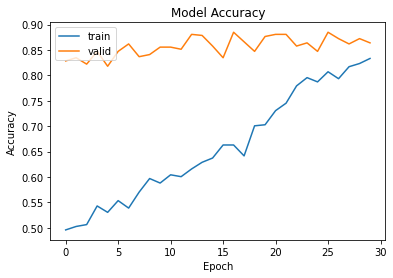

--------------------------------------------------
Training for fold 2 ...
Epoch 1/30
60/60 [==============================] - 1s 1ms/step - loss: 1.7783 - accuracy: 0.4835
Epoch 2/30
60/60 [==============================] - 0s 2ms/step - loss: 0.9437 - accuracy: 0.5092
Epoch 3/30
60/60 [==============================] - 0s 1ms/step - loss: 0.7727 - accuracy: 0.5364
Epoch 4/30
60/60 [==============================] - 0s 2ms/step - loss: 0.7217 - accuracy: 0.5856
Epoch 5/30
60/60 [==============================] - 0s 2ms/step - loss: 0.7180 - accuracy: 0.5830
Epoch 6/30
60/60 [==============================] - 0s 2ms/step - loss: 0.7042 - accuracy: 0.5930
Epoch 7/30
60/60 [==============================] - 0s 1ms/step - loss: 0.7027 - accuracy: 0.5825
Epoch 8/30
60/60 [==============================] - 0s 1ms/step - loss: 0.6831 - accuracy: 0.6029
Epoch 9/30
60/60 [==============================] - 0s 1ms/step - loss: 0.6609 - accuracy: 0.6108
Epoch 10/30
60/60 [========================

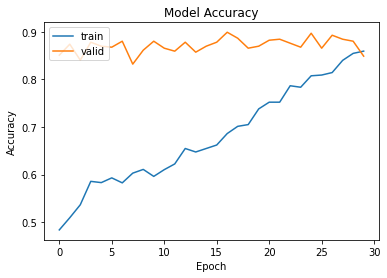

--------------------------------------------------
Training for fold 3 ...
Epoch 1/30
60/60 [==============================] - 1s 1ms/step - loss: 0.7967 - accuracy: 0.5118
Epoch 2/30
60/60 [==============================] - 0s 1ms/step - loss: 0.8016 - accuracy: 0.5045
Epoch 3/30
60/60 [==============================] - 0s 2ms/step - loss: 0.7336 - accuracy: 0.5076
Epoch 4/30
60/60 [==============================] - 0s 2ms/step - loss: 0.7251 - accuracy: 0.5202
Epoch 5/30
60/60 [==============================] - 0s 1ms/step - loss: 0.7209 - accuracy: 0.5034
Epoch 6/30
60/60 [==============================] - 0s 2ms/step - loss: 0.7115 - accuracy: 0.5055
Epoch 7/30
60/60 [==============================] - 0s 2ms/step - loss: 0.7001 - accuracy: 0.5039
Epoch 8/30
60/60 [==============================] - 0s 2ms/step - loss: 0.7043 - accuracy: 0.5097
Epoch 9/30
60/60 [==============================] - 0s 2ms/step - loss: 0.7058 - accuracy: 0.4950
Epoch 10/30
60/60 [========================

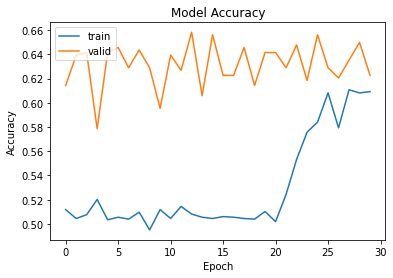

--------------------------------------------------
Training for fold 4 ...
Epoch 1/30
60/60 [==============================] - 1s 1ms/step - loss: 0.8866 - accuracy: 0.4825
Epoch 2/30
60/60 [==============================] - 0s 1ms/step - loss: 0.7751 - accuracy: 0.4924
Epoch 3/30
60/60 [==============================] - 0s 2ms/step - loss: 0.7231 - accuracy: 0.4935
Epoch 4/30
60/60 [==============================] - 0s 2ms/step - loss: 0.7218 - accuracy: 0.5050
Epoch 5/30
60/60 [==============================] - 0s 2ms/step - loss: 0.7116 - accuracy: 0.4882
Epoch 6/30
60/60 [==============================] - 0s 1ms/step - loss: 0.7183 - accuracy: 0.5092
Epoch 7/30
60/60 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5228
Epoch 8/30
60/60 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.5165
Epoch 9/30
60/60 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.5050
Epoch 10/30
60/60 [========================

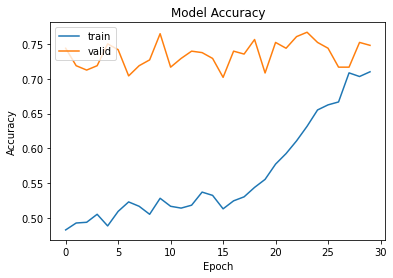

--------------------------------------------------
Training for fold 5 ...
Epoch 1/30
60/60 [==============================] - 1s 2ms/step - loss: 2.0222 - accuracy: 0.5003
Epoch 2/30
60/60 [==============================] - 0s 2ms/step - loss: 1.2444 - accuracy: 0.4914
Epoch 3/30
60/60 [==============================] - 0s 2ms/step - loss: 0.8986 - accuracy: 0.5223
Epoch 4/30
60/60 [==============================] - 0s 1ms/step - loss: 0.8208 - accuracy: 0.4976
Epoch 5/30
60/60 [==============================] - 0s 2ms/step - loss: 0.7473 - accuracy: 0.5123
Epoch 6/30
60/60 [==============================] - 0s 2ms/step - loss: 0.7316 - accuracy: 0.5238
Epoch 7/30
60/60 [==============================] - 0s 2ms/step - loss: 0.7373 - accuracy: 0.5196
Epoch 8/30
60/60 [==============================] - 0s 2ms/step - loss: 0.7082 - accuracy: 0.5390
Epoch 9/30
60/60 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5867
Epoch 10/30
60/60 [========================

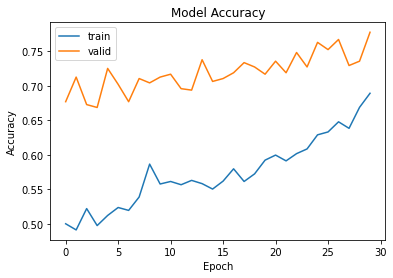

In [ ]:
fold_no = 1
loss_per_fold =[]
acc_per_fold = []

for trainIndex, validIndex in kf.split(XY_resampled):
  # Define the model 
  model_NN = Sequential()

  model_NN.add(Dense(10, input_dim=3, activation = "relu"))
  model_NN.add(Dropout(0.2))

  model_NN.add(Dense(8, activation = "relu"))
  model_NN.add(Dropout(0.3))

  model_NN.add(Dense(6, activation = "relu"))
  model_NN.add(Dropout(0.3))

  model_NN.add(Dense(1, activation = "sigmoid"))

  model_NN.compile(loss = 'binary_crossentropy', optimizer = "Adam", metrics = ["accuracy"])

  # Generate a print
  print('-'*50)
  print(f'Training for fold {fold_no} ...')

  # Fit training data to model
  history = model_NN.fit(XY_resampled.iloc[trainIndex,0:3], XY_resampled.iloc[trainIndex,3],
              batch_size=32,
              epochs=30,
              verbose=1)
  # Fit validation data to model
  history_Valid = model_NN.fit(XY_resampled.iloc[validIndex,0:3], XY_resampled.iloc[validIndex,3],
              batch_size=32,
              epochs=30,
              verbose=1)

  # Evaluate the model (Loss & Accuracy)
  scores = model_NN.evaluate(XY_resampled.iloc[validIndex,0:3], XY_resampled.iloc[validIndex, 3], verbose=1)
  print(f'Score for fold {fold_no}: {model_NN.metrics_names[0]} of {scores[0]}; {model_NN.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # plot the Accuracy of training and validation in each epoch
  plt.plot(history.history['accuracy'])
  plt.plot(history_Valid.history['accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'valid'], loc='upper left')
  plt.show()

  fold_no = fold_no + 1

In [ ]:
# Accuracy per fold
print(acc_per_fold)

[94.56067085266113, 93.29140186309814, 84.48637127876282, 86.58280968666077, 86.16352081298828]


In [ ]:
# Loss per fold
print(loss_per_fold)

[0.24832649528980255, 0.22153596580028534, 0.6179459691047668, 0.46685686707496643, 0.46972301602363586]


In [ ]:
## Test Data
pred_NN = model_NN.predict(X_test)
pred_NN = np.where(pred_NN > 0.5,1,0)
cm_NN = confusion_matrix(Y_test, pred_NN)
print(cm_NN)

[[376 141]
 [  0  81]]


In [ ]:
# Prediction report for Test Dataset(precision, recall rate, F1, accuracy)
print(classification_report(Y_test, pred_NN)) 

              precision    recall  f1-score   support

           0       1.00      0.73      0.84       517
           1       0.36      1.00      0.53        81

    accuracy                           0.76       598
   macro avg       0.68      0.86      0.69       598
weighted avg       0.91      0.76      0.80       598



# **Logistic Regression**

In [ ]:
from sklearn import linear_model
from sklearn.metrics import confusion_matrix

In [ ]:
fold_no = 1
loss_per_fold =[]
acc_per_fold = []

for trainIndex, validIndex in kf.split(XY_resampled):
  # Define the model 
  model_LR = linear_model.LogisticRegression()

  # Generate a print
  print('-'*50)
  print(f'Training for fold {fold_no} ...')

  # Fit training data to model
  history = model_LR.fit(XY_resampled.iloc[trainIndex,0:3], XY_resampled.iloc[trainIndex,3])
  # Fit validation data to model
  history_Valid = model_LR.fit(XY_resampled.iloc[validIndex,0:3], XY_resampled.iloc[validIndex,3])

  # Evaluate the model (Loss & Accuracy)
  scores = model_LR.score(XY_resampled.iloc[validIndex,0:3], XY_resampled.iloc[validIndex, 3])
  score = round(scores*100,2)
  print(f'Accuracy:  {score} %')

  fold_no = fold_no + 1

--------------------------------------------------
Training for fold 1 ...
Accuracy:  95.82 %
--------------------------------------------------
Training for fold 2 ...
Accuracy:  93.71 %
--------------------------------------------------
Training for fold 3 ...
Accuracy:  94.13 %
--------------------------------------------------
Training for fold 4 ...
Accuracy:  95.6 %
--------------------------------------------------
Training for fold 5 ...
Accuracy:  93.5 %


In [ ]:
## Test Data
pred_LR = model_LR.predict(X_test)
cm_LR = confusion_matrix(Y_test, pred_LR)
print(cm_LR)

[[475  42]
 [  7  74]]


In [ ]:
# Prediction report for Test Dataset(precision, recall rate, F1, accuracy)
print(classification_report(Y_test, pred_LR)) 

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       517
           1       0.64      0.91      0.75        81

    accuracy                           0.92       598
   macro avg       0.81      0.92      0.85       598
weighted avg       0.94      0.92      0.92       598



# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
fold_no = 1
loss_per_fold =[]
acc_per_fold = []

for trainIndex, validIndex in kf.split(XY_resampled):
  # Define the model 
  model_RF = RandomForestClassifier(max_depth=3)

  # Generate a print
  print('-'*50)
  print(f'Training for fold {fold_no} ...')

  # Fit training data to model
  history = model_RF.fit(XY_resampled.iloc[trainIndex,0:3], XY_resampled.iloc[trainIndex,3])
  # Fit validation data to model
  history_Valid = model_RF.fit(XY_resampled.iloc[validIndex,0:3], XY_resampled.iloc[validIndex,3])

  # Evaluate the model (Loss & Accuracy)
  scores = model_RF.score(XY_resampled.iloc[validIndex,0:3], XY_resampled.iloc[validIndex, 3])
  score = round(scores*100,2)
  print(f'Accuracy:  {score} %')

  fold_no = fold_no + 1

--------------------------------------------------
Training for fold 1 ...
Accuracy:  97.07 %
--------------------------------------------------
Training for fold 2 ...
Accuracy:  95.6 %
--------------------------------------------------
Training for fold 3 ...
Accuracy:  95.39 %
--------------------------------------------------
Training for fold 4 ...
Accuracy:  95.18 %
--------------------------------------------------
Training for fold 5 ...
Accuracy:  95.6 %


In [ ]:
## Test Data
pred_RF = model_RF.predict(X_test)
cm_RF = confusion_matrix(Y_test, pred_RF)
print(cm_RF)

[[474  43]
 [  3  78]]


In [ ]:
# Prediction report for Test Dataset(precision, recall rate, F1, accuracy)
print(classification_report(Y_test, pred_RF)) 

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       517
           1       0.64      0.96      0.77        81

    accuracy                           0.92       598
   macro avg       0.82      0.94      0.86       598
weighted avg       0.95      0.92      0.93       598

